In [1]:
import kagglehub

path = kagglehub.dataset_download("ignaciovinuales/battery-remaining-useful-life-rul")

print("Path to dataset files:", path)

100%|██████████| 374k/374k [00:00<00:00, 60.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ignaciovinuales/battery-remaining-useful-life-rul/versions/3


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(path + '/Battery_RUL.csv')

In [4]:
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [6]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


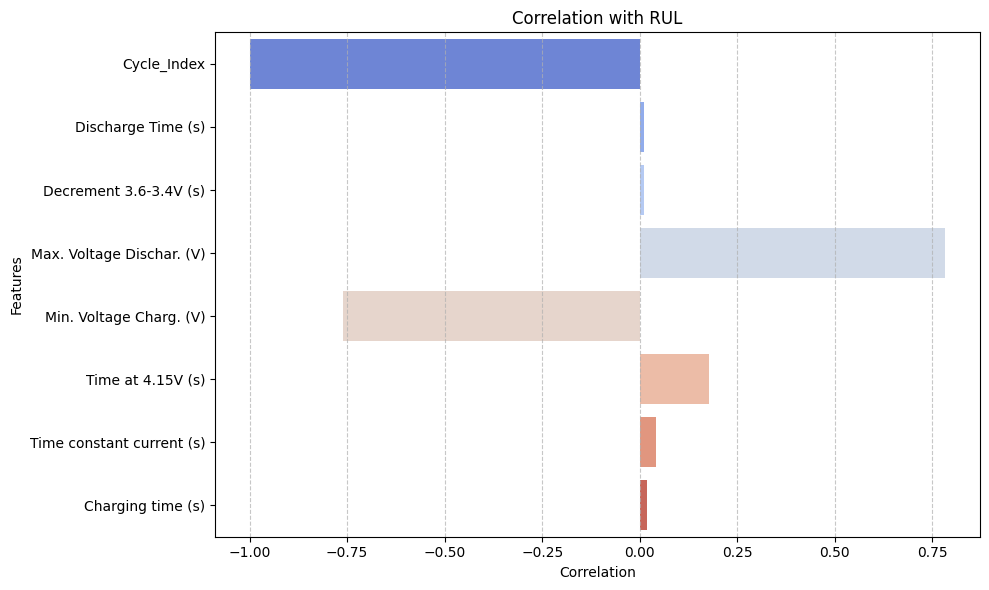

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corrwith(df['RUL']).drop('RUL')
plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index, hue=corr.index, palette="coolwarm")

plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation with RUL')

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

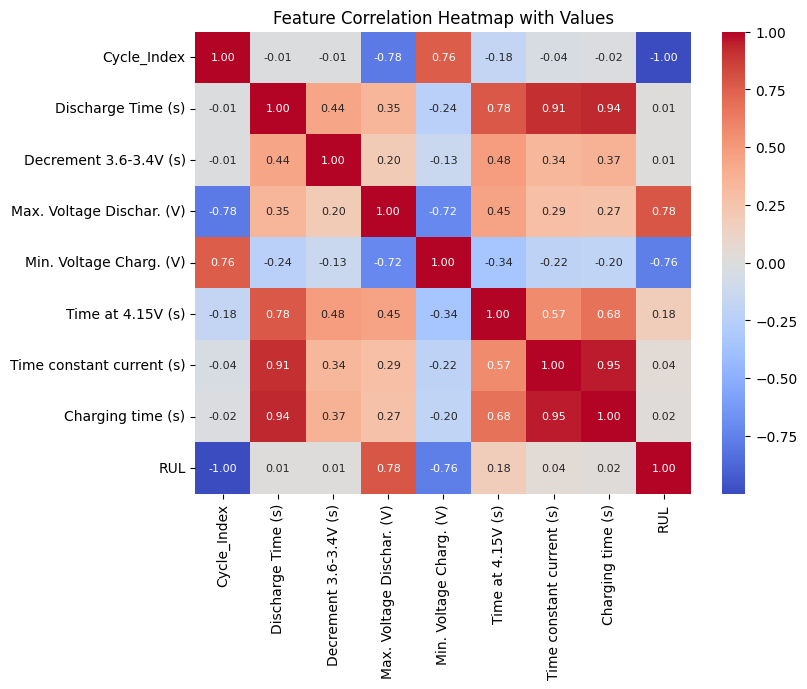

In [8]:
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 8})
plt.title("Feature Correlation Heatmap with Values")
plt.show()

In [9]:
X = df.drop(columns=['RUL'])
y = df['RUL']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Deep Learning Model

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# input layer
input_layer = Input(shape=(X_train_scaled.shape[1],))

# dense layer
x = Dense(128, activation='relu', name='Hidden_Layer_1')(input_layer)
x = Dense(64, activation='relu', name='Hidden_Layer_2')(x)
x = Dense(32, activation='relu', name='Hidden_Layer_3')(x)

# output layer
output_layer = Dense(1, activation='linear', name='Output_Layer')(x)

# model
model = Model(inputs=input_layer, outputs=output_layer)

In [13]:
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 197941.0156 - mae: 318.2353 - val_loss: 9065.1289 - val_mae: 28.4589
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1249.9089 - mae: 18.6369 - val_loss: 5933.9507 - val_mae: 15.0979
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 602.8004 - mae: 11.6023 - val_loss: 4472.8394 - val_mae: 11.7455
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 320.6855 - mae: 8.9460 - val_loss: 3513.2292 - val_mae: 9.4051
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 197.6858 - mae: 7.4635 - val_loss: 2885.9626 - val_mae: 8.5841
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 149.6957 - mae: 6.5003 - val_loss: 2844.6948 - val_mae: 9.9206
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 181.3632 - mae: 7.1482 - val_loss: 2152.3867 - val_mae: 6.4530
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 112.3403 - mae: 6.1099 - val_loss: 2082.1768 - val_mae: 8.4522
Epoch

In [15]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MAE: 8.02
RMSE: 10.69
R2 Score: 0.9989


In [16]:
single_row_original = df.iloc[[60]]

single_row_X = single_row_original.drop(columns=['RUL'])
single_row_y = single_row_original['RUL']

single_row_X_scaled = scaler.transform(single_row_X)
single_row_pred = model.predict(single_row_X_scaled)

print(f"Actual RUL: {single_row_y.iloc[0]}")
print(f"Predicted RUL: {single_row_pred[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Actual RUL: 1051
Predicted RUL: 1058.75


In [18]:
model.save("rul-model.keras")